# 1. import the necessery libraries


In [1]:
!sudo nvidia-smi

Thu Nov 20 19:37:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.95.05              Driver Version: 580.95.05      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Quadro RTX 4000                Off |   00000000:18:00.0 Off |                  N/A |
| 30%   32C    P8              9W /  125W |    5911MiB /   8192MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# If you want to use the spesific GPU
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # use GPU 1 or GPU 0

import tensorflow as tf

# List GPUs available
gpus = tf.config.list_physical_devices('GPU')
print("GPUs:", gpus)

# Check if GPUs are available
if gpus:
    print("GPU is available.")
else:
    print("GPU is not available.")

# Set memory growth for each GPU
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2025-11-20 19:37:57.268709: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-20 19:37:57.325667: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-20 19:37:58.616707: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
GPU is available.


In [3]:
import numpy as np
import os
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras import regularizers

# 2. load and split the data 

In [4]:
import os 
import numpy as np 
import pandas as pd 
import imageio 
import matplotlib.pyplot as plt 

image_dir = "./data_set/images/"  # <-- use the real folder
mask_dir  = "./data_set/masks/"  # example

image_filenames = sorted([
    f for f in os.listdir(image_dir)
    if not f.startswith(".") and f.lower().endswith(".jpg")
])

mask_filenames = sorted([
    f for f in os.listdir(mask_dir)
    if not f.startswith(".") and f.lower().endswith(".png")
])

image_list = [os.path.join(image_dir, f) for f in image_filenames]
mask_list  = [os.path.join(mask_dir,  f) for f in mask_filenames]
train_image_list = image_list[:6]
train_mask_list = mask_list[:6]

validation_image_list = image_list[6:7]
validation_mask_list = mask_list[6:7]

print("image_list:", train_image_list)
print("mask_list:", train_mask_list)


image_list: ['./data_set/images/post-harvest_01.jpg', './data_set/images/post-harvest_01_2.jpg', './data_set/images/post-harvest_01_3.jpg', './data_set/images/post-harvest_02.jpg', './data_set/images/post-harvest_02_2.jpg', './data_set/images/post-harvest_03.jpg']
mask_list: ['./data_set/masks/post-harvest_01.png', './data_set/masks/post-harvest_01_2.png', './data_set/masks/post-harvest_01_3.png', './data_set/masks/post-harvest_02.png', './data_set/masks/post-harvest_02_2.png', './data_set/masks/post-harvest_03.png']


# 3. explore some images :

(312, 312, 3)
(312, 312)


/tmp/ipykernel_1950811/3232672074.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img  = imageio.imread(train_image_list[n])
/tmp/ipykernel_1950811/3232672074.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread(train_mask_list[n])


Text(0.5, 1.0, 'Mask')

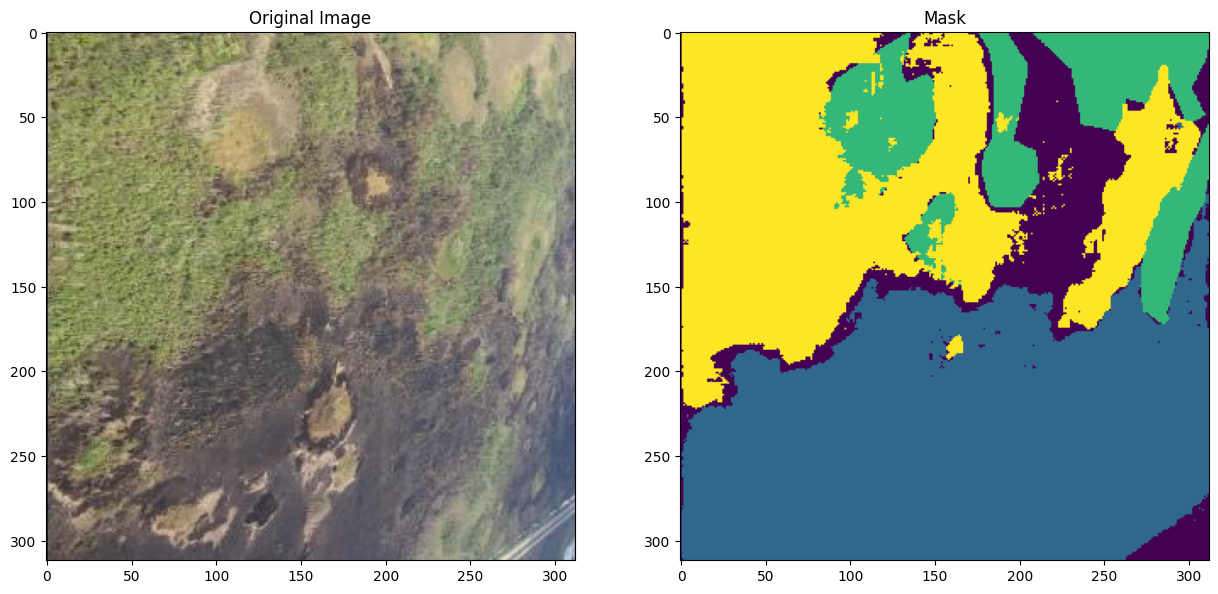

In [5]:
n = 1 # you can chose any index 
img  = imageio.imread(train_image_list[n])
print(img.shape)
mask = imageio.imread(train_mask_list[n])
print(mask.shape)

# now let's plot 
fig ,arr  = plt.subplots(1,2,figsize=(15,10))
arr[0].imshow(img)
arr[0].set_title('Original Image')
arr[1].imshow(mask)
arr[1].set_title('Mask')

In [6]:
train_images = tf.constant(train_image_list)
train_masks = tf.constant(train_mask_list)

train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_masks))
for image,mask in train_dataset.take(1) : 
    print(image)
    print(mask)
    
validation_images = tf.constant(validation_image_list)
validation_masks = tf.constant(validation_mask_list)

validation_dataset = tf.data.Dataset.from_tensor_slices((validation_images,validation_masks))
for image,mask in validation_dataset.take(1) : 
    print(image)
    print(mask)    

tf.Tensor(b'./data_set/images/post-harvest_01.jpg', shape=(), dtype=string)
tf.Tensor(b'./data_set/masks/post-harvest_01.png', shape=(), dtype=string)
tf.Tensor(b'./data_set/images/post-harvest_03_2.jpg', shape=(), dtype=string)
tf.Tensor(b'./data_set/masks/post-harvest_03_2.png', shape=(), dtype=string)


I0000 00:00:1763667486.214060 1950811 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1554 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:18:00.0, compute capability: 7.5
I0000 00:00:1763667486.215678 1950811 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6090 MB memory:  -> device: 1, name: Quadro RTX 4000, pci bus id: 0000:3b:00.0, compute capability: 7.5
2025-11-20 19:38:06.292885: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-20 19:38:06.311743: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# 4. preprocessing our data

In [7]:
def process_path(image_path,mask_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img,channels=3)
    img = tf.image.convert_image_dtype(img,tf.float32) #this do the same as dividing by 255 to set the values between 0 and 1 (normalization)
    
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask,channels=3)
    mask = tf.math.reduce_max(mask,axis=-1,keepdims=True)
    return img , mask

def preprocess(image,mask) : 
    input_image = tf.image.resize(image,(96,128),method='nearest')
    input_mask = tf.image.resize(mask,(96,128),method='nearest')
    
    return input_image , input_mask

train_image_ds = train_dataset.map(process_path) # apply the preprocces_path function to our train_dataset
print(train_image_ds)
train_processed_image_ds = train_image_ds.map(preprocess) # apply the preprocess function to our train_dataset

validation_image_ds = validation_dataset.map(process_path) # apply the preprocces_path function to our validation_dataset
print(validation_image_ds)
validation_processed_image_ds = validation_image_ds.map(preprocess) 


<_MapDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None))>


# Defining mean iou metric

In [8]:

NUM_CLASSES = 4

def mean_iou_metric(y_true, y_pred, smooth=1e-7):
    # y_true: (B, H, W) or (B, H, W, 1)
    # y_pred: (B, H, W, NUM_CLASSES) logits
    
    # Squeeze extra channel if exists
    if y_true.shape.rank == 4 and y_true.shape[-1] == 1:
        y_true = tf.squeeze(y_true, axis=-1)
    
    y_true = tf.cast(y_true, tf.int32)

    # Convert logits → class probabilities
    y_pred = tf.nn.softmax(y_pred, axis=-1)

    # Get predicted class ID
    y_pred_labels = tf.argmax(y_pred, axis=-1, output_type=tf.int32)

    # Compute IoU per class
    ious = []
    for c in range(NUM_CLASSES):
        y_true_c = tf.cast(tf.equal(y_true, c), tf.float32)
        y_pred_c = tf.cast(tf.equal(y_pred_labels, c), tf.float32)

        intersection = tf.reduce_sum(y_true_c * y_pred_c)
        union = tf.reduce_sum(y_true_c) + tf.reduce_sum(y_pred_c) - intersection

        iou = (intersection + smooth) / (union + smooth)
        ious.append(iou)

    # Return mean IoU over classes
    return tf.reduce_mean(tf.stack(ious))

# 5.  Define The Conv Block For The Contracting Path


In [9]:
def conv_block(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    
    conv = Conv2D(n_filters, 
                  kernel_size = 3,     
                  activation='relu',
                  padding='same',
                  kernel_initializer=tf.keras.initializers.HeNormal())(inputs)
    conv = Conv2D(n_filters, 
                  kernel_size = 3, 
                  activation='relu',
                  padding='same',
                  kernel_initializer=tf.keras.initializers.HeNormal())(conv)
   
    

    if dropout_prob > 0:
        conv = Dropout(dropout_prob)(conv)
        
    if max_pooling:
        next_layer = MaxPooling2D(pool_size=(2,2))(conv)
        
        
    else:
        next_layer = conv
        
    skip_connection = conv
    
    return next_layer, skip_connection

# 6. Define the upsampling block for the expanding path

In [10]:
def upsampling_block(expansive_input, contractive_input, n_filters=32):
    
    up = Conv2DTranspose(
                 n_filters,  
                 kernel_size = 3,
                 strides=(2,2),
                 padding='same')(expansive_input)
    
    merge = concatenate([up, contractive_input], axis=3)
    conv = Conv2D(n_filters,  
                 kernel_size = 3,   
                 activation='relu',
                 padding='same',
                 kernel_initializer=tf.keras.initializers.HeNormal())(merge)
    conv = Conv2D(n_filters,  
                 kernel_size = 3,  
                 activation='relu',
                 padding='same',
                 kernel_initializer=tf.keras.initializers.HeNormal())(conv)
    
    
    return conv

# 7. Finally! ,  we will Define the unet model 
## which composes of a set of conv blocks and upsampling blocks

In [11]:
def unet_model(input_size=(96, 128, 3), n_filters=32, n_classes=23):
    
    inputs = Input(input_size)
    
    # contracting path
    cblock1 = conv_block(inputs, n_filters, dropout_prob=0.4)
    cblock2 = conv_block(cblock1[0], 2*n_filters, dropout_prob=0.4)
    cblock3 = conv_block(cblock2[0], 4*n_filters, dropout_prob=0.4)
    cblock4 = conv_block(cblock3[0], 8*n_filters, dropout_prob=0.45) 
    cblock5 = conv_block(cblock4[0],16*n_filters, dropout_prob=0.4, max_pooling=None)     
    
    # expanding path
    ublock6 = upsampling_block(cblock5[0], cblock4[1],  8 * n_filters)
    ublock7 = upsampling_block(ublock6, cblock3[1],  n_filters*4)
    ublock8 = upsampling_block(ublock7,cblock2[1] , n_filters*2)
    ublock9 = upsampling_block(ublock8,cblock1[1],  n_filters)

    conv9 = Conv2D(n_filters,
                 3,
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_normal')(ublock9)
    
    conv10 = Conv2D(n_classes, kernel_size=1, padding='same')(conv9)  
    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

In [12]:
img_height = 96
img_width = 128
num_channels = 3

unet = unet_model((img_height, img_width, num_channels))

# 8. Our model is ready !!

In [13]:
unet.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 128,   │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 96, 128,   │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 96, 128,   │      9,248 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 96, 128,   │          0 │ conv2d_1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 48, 64,    │          0 │ dropout[0][0]     │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 48, 64,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 48, 64,    │     36,928 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 48, 64,    │          0 │ conv2d_3[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 24, 32,    │          0 │ dropout_1[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 24, 32,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 24, 32,    │    147,584 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 24, 32,    │          0 │ conv2d_5[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 12, 16,    │          0 │ dropout_2[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 12, 16,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 12, 16,    │    590,080 │ conv2d_6[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 12, 16,    │          0 │ conv2d_7[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 6, 8, 256) │          0 │ dropout_3[0][0] 

 Total params: 8,640,471 (32.96 MB)

 Trainable params: 8,640,471 (32.96 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
unet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy', mean_iou_metric])

In [15]:
EPOCHS = 500
VAL_SUBSPLITS = 5
BUFFER_SIZE = 390
BATCH_SIZE = 2

# train
train_processed_image_ds.batch(BATCH_SIZE)
train_dataset = train_processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(train_processed_image_ds.element_spec)

# validation
validation_processed_image_ds.batch(BATCH_SIZE)
validation_dataset = validation_processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(validation_processed_image_ds.element_spec)
 

model_history = unet.fit(train_dataset, epochs=EPOCHS)

(TensorSpec(shape=(96, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(96, 128, 1), dtype=tf.uint8, name=None))
(TensorSpec(shape=(96, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(96, 128, 1), dtype=tf.uint8, name=None))
Epoch 1/500


2025-11-20 19:38:16.337543: I external/local_xla/xla/service/service.cc:163] XLA service 0x7a320c003b60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-20 19:38:16.337575: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): Quadro RTX 4000, Compute Capability 7.5
2025-11-20 19:38:16.337582: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (1): Quadro RTX 4000, Compute Capability 7.5
2025-11-20 19:38:16.463530: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-20 19:38:16.804173: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
2025-11-20 19:38:17.267697: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91

3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.0981 - loss: 3.1309 - mean_iou_metric: 0.0503
Epoch 2/500
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3040 - loss: 2.9691 - mean_iou_metric: 0.0992

I0000 00:00:1763667507.218774 1951109 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2757 - loss: 2.9489 - mean_iou_metric: 0.0814
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3258 - loss: 3.0071 - mean_iou_metric: 0.0827
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2687 - loss: 2.6337 - mean_iou_metric: 0.0899
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2652 - loss: 2.4729 - mean_iou_metric: 0.1042
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3014 - loss: 2.1758 - mean_iou_metric: 0.1115
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3580 - loss: 1.8189 - mean_iou_metric: 0.1333
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4039 - loss: 1.6142 - mean_iou_metric: 0.1568
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4782 - loss: 1.4162 - mean_iou_metric: 0.2130
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4613 - loss: 1.2672 - mean_iou_metric: 0.2236
Epoch 11/500
3/3 ━━━━

In [16]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


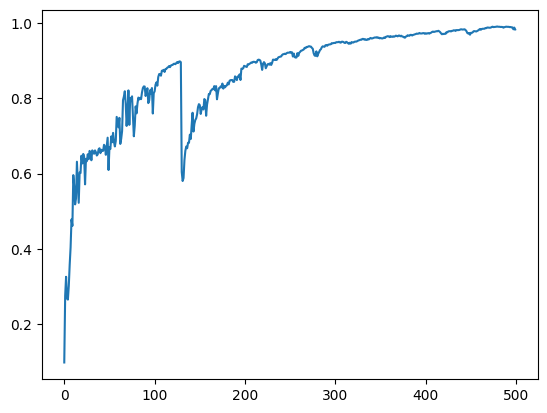

In [17]:
plt.plot(model_history.history["accuracy"])

In [18]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [19]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [20]:
def show_predictions(dataset=None, num=1):
    """
    Displays the first image of each of the num batches
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = unet.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
             create_mask(unet.predict(sample_image[tf.newaxis, ...]))])

In [21]:
print(EPOCHS)

500


----- training_dataset results---------


2025-11-20 19:39:16.336123: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[2,128,24,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[2,64,24,32]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-11-20 19:39:16.380840: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[2,128,24,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[2,128,24,32]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target=

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


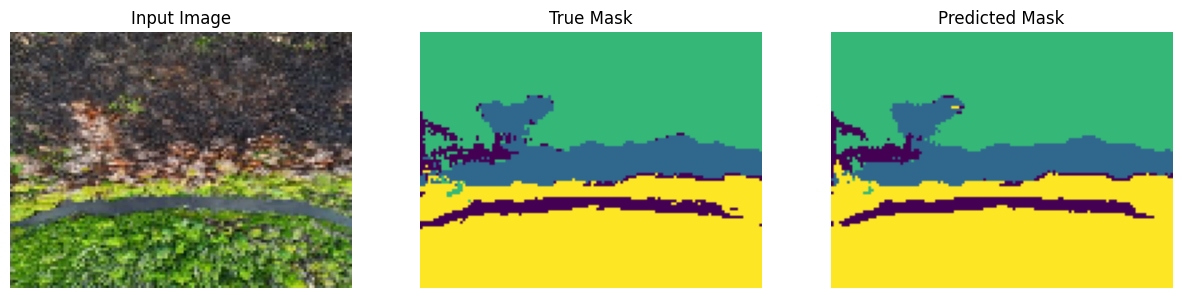

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


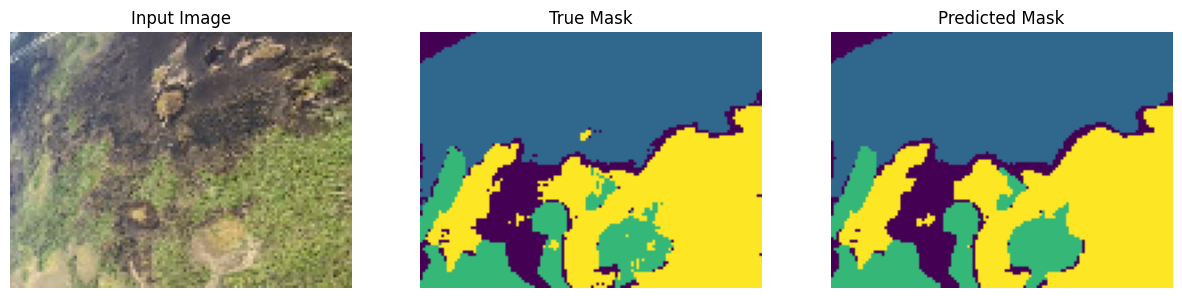

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


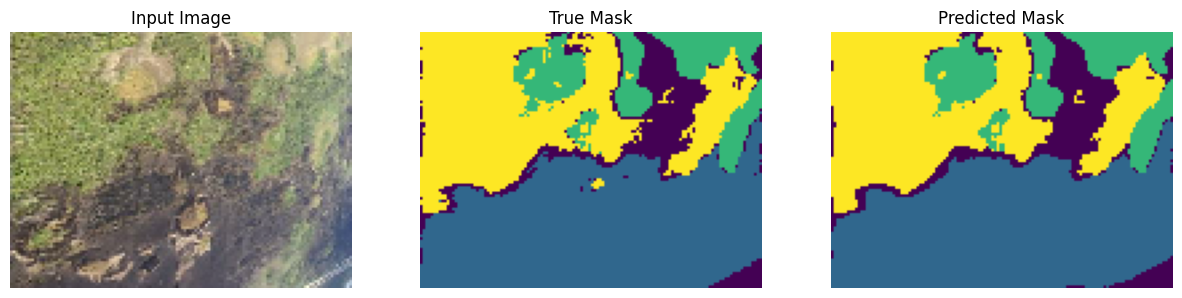

----- validation_dataset results---------


2025-11-20 19:39:18.901688: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[1,128,24,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,64,24,32]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2025-11-20 19:39:18.946503: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[1,128,24,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,128,24,32]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target=

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


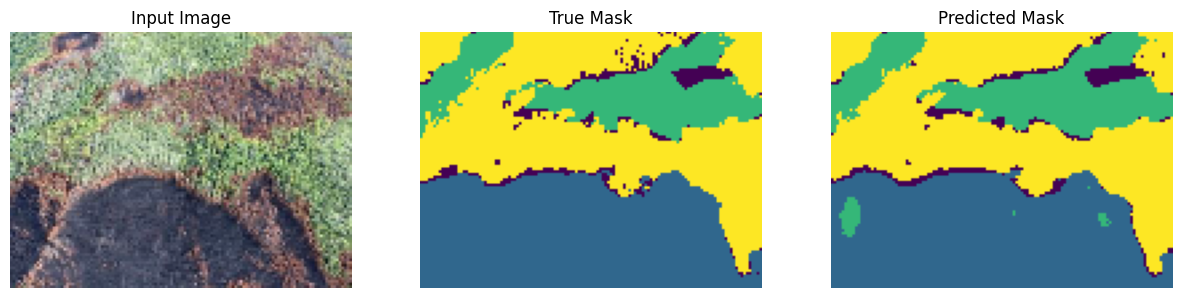

2025-11-20 19:39:20.320835: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [22]:
print("----- training_dataset results---------")
show_predictions(train_dataset, 6)
print("----- validation_dataset results---------")
show_predictions(validation_dataset, 6)

In [23]:
# model evaluation
print("Unet Model Evaluation: ")
unet.evaluate(validation_dataset)

Unet Model Evaluation: 


2025-11-20 19:39:20.828815: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:39] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9611 - loss: 0.1017 - mean_iou_metric: 0.8528


[0.1017330139875412, 0.9611002802848816, 0.8528411388397217]